In [1]:
import sympy as sy
import numpy as np
from sympy.plotting import plot, plot_parametric
import scipy.optimize as sci_opt

In [59]:
sy_t = sy.symbols('t')

def sy_straight(p0, d, sy_t=sy_t):
    v_p0 = sy.Matrix(p0)
    v_d = sy.Matrix(d)
    sy_f = v_p0 + v_d.multiply(sy_t)
    return sy_f

def sy_arc(p0, r, a0, d, sy_t=sy_t):
    v_p0 = sy.Matrix(p0)
    sy_tau = a0 + d*sy_t
    sy_g = sy.Matrix([sy.cos(sy_tau), sy.sin(sy_tau)])
    sy_f = v_p0 + sy_g.multiply(r)
    return sy.simplify(sy_f)

def sy_interp(sy_f, sy_g, sy_t=sy_t):
    return sy.simplify(sy_t*sy_f + (1.0-sy_t)*sy_g)

def sy_lin_map(sy_f, t0, t1, sy_t=sy_t):
    sy_g = t0+(t1-t0)*sy_t
    return sy.simplify(sy_f.subs({sy_t:sy_g}))

def sy_f_tangent(sy_f, sy_t=sy_t):
    return sy.simplify(sy_f.jacobian(sy.Matrix([sy_t])))
    
def sy_f_normal(sy_f, sy_t=sy_t):
    tng = sy_f_tangent(sy_f, sy_t)
    return sy.simplify(sy.Matrix([-tng[1], tng[0]]))
    
def sy_f_arc_length(sy_f, sy_t=sy_t):
    sy_f_jac = sy_f.jacobian(sy.Matrix([sy_t]))
    fx, fy = sy_f_jac[0], sy_f_jac[1]
    sy_l = sy.sqrt(fx*fx + fy*fy)
    return sy.simplify(sy.integrate(sy_l, sy_t))

def sy_f_arc_length_eval(sy_f_arc_length, t0, t1, sy_t=sy_t):
    return sy_f_arc_length.subs(sy_t, t1)-sy_f_arc_length.subs(sy_t, t0)

def closest_t(sy_f, pt, sy_t=sy_t):
    obj_f_vec = sy_f - sy.Matrix(pt)
    obj_f = obj_f_vec.dot(obj_f_vec)
    #print(obj_f)
    res = sci_opt.minimize(sy.lambdify(sy_t, obj_f), 0.5) # TODO jac
    return res.x if res.success else None

def dbg_print_sy_f(sy_f, sy_t=sy_t):
    print(sy_f)
    print(sy_f.jacobian(sy.Matrix([sy_t])))
    # print(sy.lambdify(sy_t, sy_f))
    print(sy.lambdify(sy_t, sy_f)(0.5))
    plot_parametric((sy_f[0], sy_f[1]), (sy_t, 0,1), aspect_ratio=(1,1));

def dbg_plot_sy_f_batch(sy_f_batch, colors=['blue','green', 'purple', 'pink', 'red', 'black'], sy_t=sy_t):
    plts = [plot_parametric((sy_f_batch[i][0], sy_f_batch[i][1]), (sy_t, 0,1), aspect_ratio=(1,1), line_color=colors[i%len(colors)], show=False) for i in range(len(sy_f_batch))]
    for plt in plts[1:]:
        plts[0].append(plt[0])
    plts[0].show()

def dbg_plot_closest(sy_f, pt, sy_t=sy_t):
    t = closest_t(sy_f, pt)
    print(t)
    closest_pt = sy_f.subs(sy_t, t)
    print(list(closest_pt.vec()))
    closest_dbg_seg = sy_straight(pt, closest_pt-sy.Matrix(pt))
    print(closest_dbg_seg)
    dbg_plot_sy_f_batch([sy_f, closest_dbg_seg])

In [5]:
straight_0 = sy_straight([1,1], [10,20])
dbg_print_sy_f(straight_0)

Matrix([[10*t + 1], [20*t + 1]])
Matrix([[10], [20]])
[[ 6.]
 [11.]]


<Figure size 640x480 with 1 Axes>

Matrix([[10*cos(4*t - 0.1) + 1], [1 - 10*sin(4*t - 0.1)]])
Matrix([[-40*sin(4*t - 0.1)], [-40*cos(4*t - 0.1)]])
[[-2.23289567]
 [-8.46300088]]


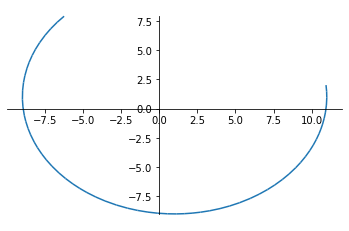

In [6]:
arc_0 = sy_arc([1,1], 10, 0.1, -4)
dbg_print_sy_f(arc_0)

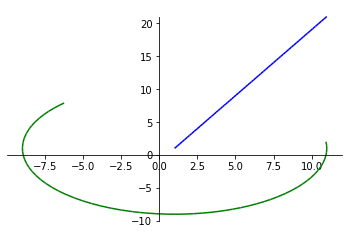

In [57]:
dbg_plot_sy_f_batch([straight_0, arc_0])

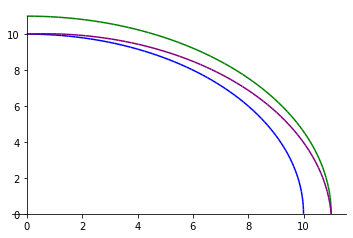

In [60]:
arc_1 = sy_arc([0,0], 10, 0, np.pi/2)
arc_2 = sy_arc([0,0], 11, 0, np.pi/2)
arc_1_2 = sy_interp(arc_1, arc_2)
dbg_plot_sy_f_batch([arc_1, arc_2, arc_1_2])

Matrix([[5.0*t + 6.0], [10.0*t + 11.0]])
Matrix([[5.00000000000000], [10.0000000000000]])
[[ 8.5]
 [16. ]]


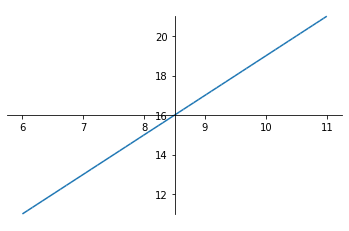

In [9]:
straight_1 = sy_lin_map(straight_0, 0.5, 1)
dbg_print_sy_f(straight_1)

Matrix([[-15.707963267949*sin(1.5707963267949*t)], [15.707963267949*cos(1.5707963267949*t)]])
Matrix([[-15.707963267949*cos(1.5707963267949*t)], [-15.707963267949*sin(1.5707963267949*t)]])
Matrix([[(1.5707963267949*t - 17.2787595947439)*cos(1.5707963267949*t) + sin(1.5707963267949*t)], [(1.5707963267949*t - 17.2787595947439)*sin(1.5707963267949*t) - cos(1.5707963267949*t)]])
Matrix([[(1.5707963267949*t - 17.2787595947439)*cos(1.5707963267949*t) + sin(1.5707963267949*t)], [(1.5707963267949*t - 17.2787595947439)*sin(1.5707963267949*t) - cos(1.5707963267949*t)]])
Matrix([[-1.5707963267949*(1.5707963267949*t - 17.2787595947439)*sin(1.5707963267949*t) + 3.14159265358979*cos(1.5707963267949*t)], [1.5707963267949*(1.5707963267949*t - 17.2787595947439)*cos(1.5707963267949*t) + 3.14159265358979*sin(1.5707963267949*t)]])
[[-10.95546093]
 [-12.36967449]]


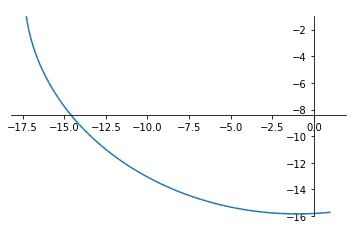

In [10]:
print(sy_f_tangent(arc_1))
print(sy_f_normal(arc_1))
print(sy_f_normal(arc_1_2))
dbg_print_sy_f(sy_f_normal(arc_1_2))

In [11]:
print(sy_f_arc_length(straight_1))
arc_1_length = sy_f_arc_length(arc_1)
print(arc_1_length)
print(sy_f_arc_length_eval(arc_1_length, 0,1.0))
print(sy_f_arc_length(arc_1_2))

11.1803398874989*t
15.707963267949*t
15.7079632679490
17.3076726665648*Integral(1.0*sqrt(0.00823687372577165*t**2 - 0.181211221966976*t + 1.0), t)


[0.16769881]
[10.4586402659060, 2.82056604414363]
Matrix([[2.45864026590601*t + 8], [0.820566044143633*t + 2]])


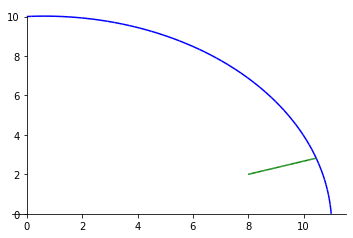

[0.36048421]
[8.97890154280893, 5.70776867310576]
Matrix([[0.978901542808925*t + 8], [0.707768673105756*t + 5]])


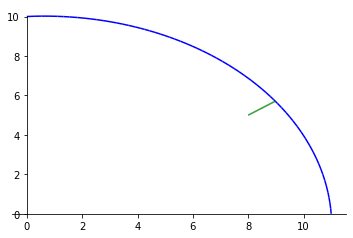

[0.65154823]
[5.38557682591447, 8.83662923443908]
Matrix([[6 - 0.614423174085526*t], [10 - 1.16337076556092*t]])


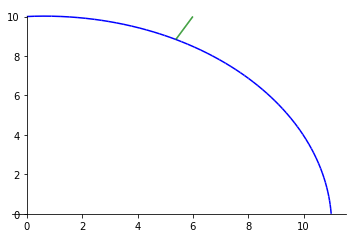

In [61]:
dbg_plot_closest(arc_1_2, [8,2])
dbg_plot_closest(arc_1_2, [8,5])
dbg_plot_closest(arc_1_2, [6,10])

In [46]:
#TODO: chain